In [0]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
import time
from keras.models import Sequential 
from keras.layers import Dense, Activation 

Using TensorFlow backend.


In [0]:
!pip install PTable

In [0]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["model_name", "Test Accuracy", "no_of_activation_units", "Droput rate of each Hidden Layer", "include/Not include BatchNorm - each hidden Layer"]

In [0]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# An example data point
print(X_train[632])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  15  1

In [0]:
#converting the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [0]:
#lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [0]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [0]:
def buildModel(no_hidden_layers,neuron_in_each_layer,dropouts=None,batchNormalization=None):
  if len(neuron_in_each_layer) == no_hidden_layers:
    output_dim = 10
    input_dim = 784
    model = Sequential()
    model.add(Dense(neuron_in_each_layer[0],activation="relu",input_shape=(input_dim,),kernel_initializer='he_normal'))
    model.add(keras.layers.Dropout(rate=dropouts[0]))
    if batchNormalization[0]:
      model.add(keras.layers.BatchNormalization())
    for i in range(1,no_hidden_layers):
      model.add(Dense(neuron_in_each_layer[i],activation="relu",kernel_initializer='he_normal'))
      model.add(keras.layers.Dropout(rate=dropouts[i]))
      if batchNormalization[i]:
        model.add(keras.layers.BatchNormalization())
    model.add(Dense(output_dim, activation='softmax'))
    return model
  else:
    print("please enter correct values: no of neuron in each layer should match with no of hidden layer")

In [0]:
model_with_2_layer = buildModel(2,(512,128),(0.3,0.5),(0,1))
model_with_2_layer.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      


In [0]:
model_with_2_layer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_with_2_layer.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 5s 88us/step - loss: 0.3984 - acc: 0.8822 - val_loss: 0.1269 - val_acc: 0.9608
Epoch 2/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.1686 - acc: 0.9508 - val_loss: 0.1044 - val_acc: 0.9668
Epoch 3/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.1257 - acc: 0.9634 - val_loss: 0.0785 - val_acc: 0.9767
Epoch 4/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.1029 - acc: 0.9690 - val_loss: 0.0768 - val_acc: 0.9763
Epoch 5/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0885 - acc: 0.9737 - val_loss: 0.0699 - val_acc: 0.9795
Epoch 6/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0755 - acc: 0.9772 - val_loss: 0.0686 - val_acc: 0.9791
Epoch 7/20
60000/60000 [

Test score: 0.06735987591733755
Test accuracy: 0.9832


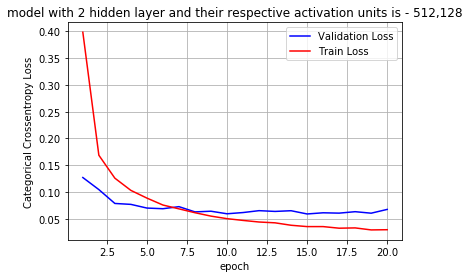

In [0]:
score = model_with_2_layer.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title("model with 2 hidden layer and their respective activation units is - 512,128")
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
table.add_row(["model_with_2_layer",score[1],"(512,128)","(0.3,0.5)", "(0,1)"])

In [0]:
model_with_3_layer = buildModel(3,(512,256,128),(0,0.2,0.5),(1,1,1))
model_with_3_layer.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [0]:
model_with_3_layer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_with_3_layer.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.3263 - acc: 0.9039 - val_loss: 0.1204 - val_acc: 0.9634
Epoch 2/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.1267 - acc: 0.9637 - val_loss: 0.0977 - val_acc: 0.9707
Epoch 3/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0932 - acc: 0.9726 - val_loss: 0.0820 - val_acc: 0.9759
Epoch 4/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.0694 - acc: 0.9795 - val_loss: 0.0841 - val_acc: 0.9742
Epoch 5/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.0573 - acc: 0.9828 - val_loss: 0.0782 - val_acc: 0.9782
Epoch 6/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0483 - acc: 0.9853 - val_loss: 0.0695 - val_acc: 0.9795
Epoch 7/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.0406 - acc: 0.9881 - val_loss: 0.0754 - 

Test score: 0.10507028651929867
Test accuracy: 0.9778


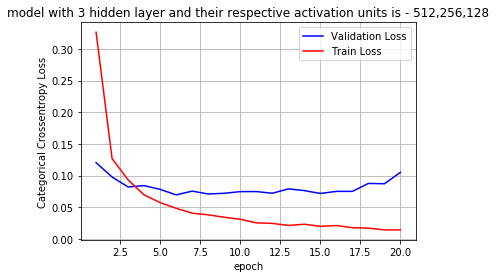

In [0]:
score = model_with_3_layer.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title("model with 3 hidden layer and their respective activation units is - 512,256,128")
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
table.add_row(["model_with_3_layer",score[1],"(512,256,128)","(0,0.2,0.5)", "(1,1,1)"])

In [0]:
model_with_5_layer = buildModel(5,(600,300,150,75,32),(0.5,0,0,0.2,0.1),(0,0,1,1,1))
model_with_5_layer.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 600)               471000    
_________________________________________________________________
dropout_6 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               180300    
_________________________________________________________________
dropout_7 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 150)               45150     
_________________________________________________________________
dropout_8 (Dropout)          (None, 150)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 150)              

In [0]:
model_with_5_layer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_with_5_layer.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.5587 - acc: 0.8350 - val_loss: 0.1534 - val_acc: 0.9538
Epoch 2/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.2174 - acc: 0.9381 - val_loss: 0.1150 - val_acc: 0.9668
Epoch 3/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.1679 - acc: 0.9522 - val_loss: 0.0934 - val_acc: 0.9723
Epoch 4/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.1400 - acc: 0.9600 - val_loss: 0.0838 - val_acc: 0.9753
Epoch 5/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.1233 - acc: 0.9662 - val_loss: 0.0855 - val_acc: 0.9751
Epoch 6/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.1070 - acc: 0.9695 - val_loss: 0.0757 - val_acc: 0.9793
Epoch 7/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.1000 - acc: 0.9711 - val_loss: 0.0791 - 

Test score: 0.06331695338832215
Test accuracy: 0.9836


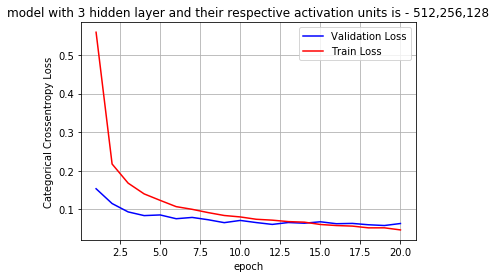

In [0]:
score = model_with_5_layer.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title("model with 3 hidden layer and their respective activation units is - 512,256,128")
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
#(600,300,150,75,32),(0.5,0,0,0.2,0.1),(0,0,1,1,1)
table.add_row(["model_with_5_layer",score[1],"(600,300,150,75,32)","(0.5,0,0,0.2,0.1)", "(0,0,1,1,1)"])

In [0]:
print(table)

+--------------------+---------------+------------------------+----------------------------------+---------------------------------------------------+
|     model_name     | Test Accuracy | no_of_activation_units | Droput rate of each Hidden Layer | include/Not include BatchNorm - each hidden Layer |
+--------------------+---------------+------------------------+----------------------------------+---------------------------------------------------+
| model_with_2_layer |     0.9832    |       (512,128)        |            (0.3,0.5)             |                       (0,1)                       |
| model_with_3_layer |     0.9778    |     (512,256,128)      |           (0,0.2,0.5)            |                      (1,1,1)                      |
| model_with_5_layer |     0.9836    |  (600,300,150,75,32)   |        (0.5,0,0,0.2,0.1)         |                    (0,0,1,1,1)                    |
+--------------------+---------------+------------------------+-------------------------------